In [1]:
# IMPORTS
import PyWGCNA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [7]:
## Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')


## Load the dataset
mrna_count = working_dir + 'data/5xFAD_paper/expressionList.csv'
sample_info_selection = working_dir + 'data/5xFAD_paper/sampleInfo.csv'
'''
## Make a subset to save RAM
subset_dataset_size = 1000
dataset = dataset.iloc[:, :subset_dataset_size] 
susbsetFile = working_dir + 'data/5xFAD_paper/expressionListSubset.csv' 
dataset.to_csv(susbsetFile, sep=',', index=False, encoding='utf-8') 

## Load the subset
geneExpressionsubset = working_dir + 'data/5xFAD_paper/expressionListSubset.csv'
'''

"\n## Make a subset to save RAM\nsubset_dataset_size = 1000\ndataset = dataset.iloc[:, :subset_dataset_size] \nsusbsetFile = working_dir + 'data/5xFAD_paper/expressionListSubset.csv' \ndataset.to_csv(susbsetFile, sep=',', index=False, encoding='utf-8') \n\n## Load the subset\ngeneExpressionsubset = working_dir + 'data/5xFAD_paper/expressionListSubset.csv'\n"

In [6]:
### LOADING REAL UNPUBLISHED DATA    -     NO PUSHING FOR THE RESULTS

## Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')

# Prepare all the files for loading
data_dir = working_dir + 'data/PROTECTED_DATA/BGI_Expression_Data/'
mrna_count = data_dir + 'CRC.SW.mRNA.symbol.count.csv'
sample_info_selection = data_dir + 'Sample_Info_Selection.csv'


IMPORTANT!!!!!!!!!!!!!!1
There is 20 more samples in the dataset than in the excel. This is caused by pacients where two samples were taken (healthy and cancer tissue), that in the excel are displayed as one single sample. 

As far as i understand, this pacients got two samples taken from the colon, but since the Transcriptomics data is from blood plasma, this 120 extra samples are not relevant for our analysis in Transcriptomics, since they would be the same samples.

In [3]:
figures_dir = working_dir + 'results/WGCNA_'  # weird folder formatting, needs to be like this.

## Initialize the WGCNA with the dataset
pyWGCNA_model = PyWGCNA.WGCNA(name='mODEL',
                              species='mus musculus',
                              geneExpPath=mrna_count,
                              outputPath=figures_dir,
                              save=True,
                              networkType="unsigned",
                              powers = None)


Saving data to be True, checking requirements ...


Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..



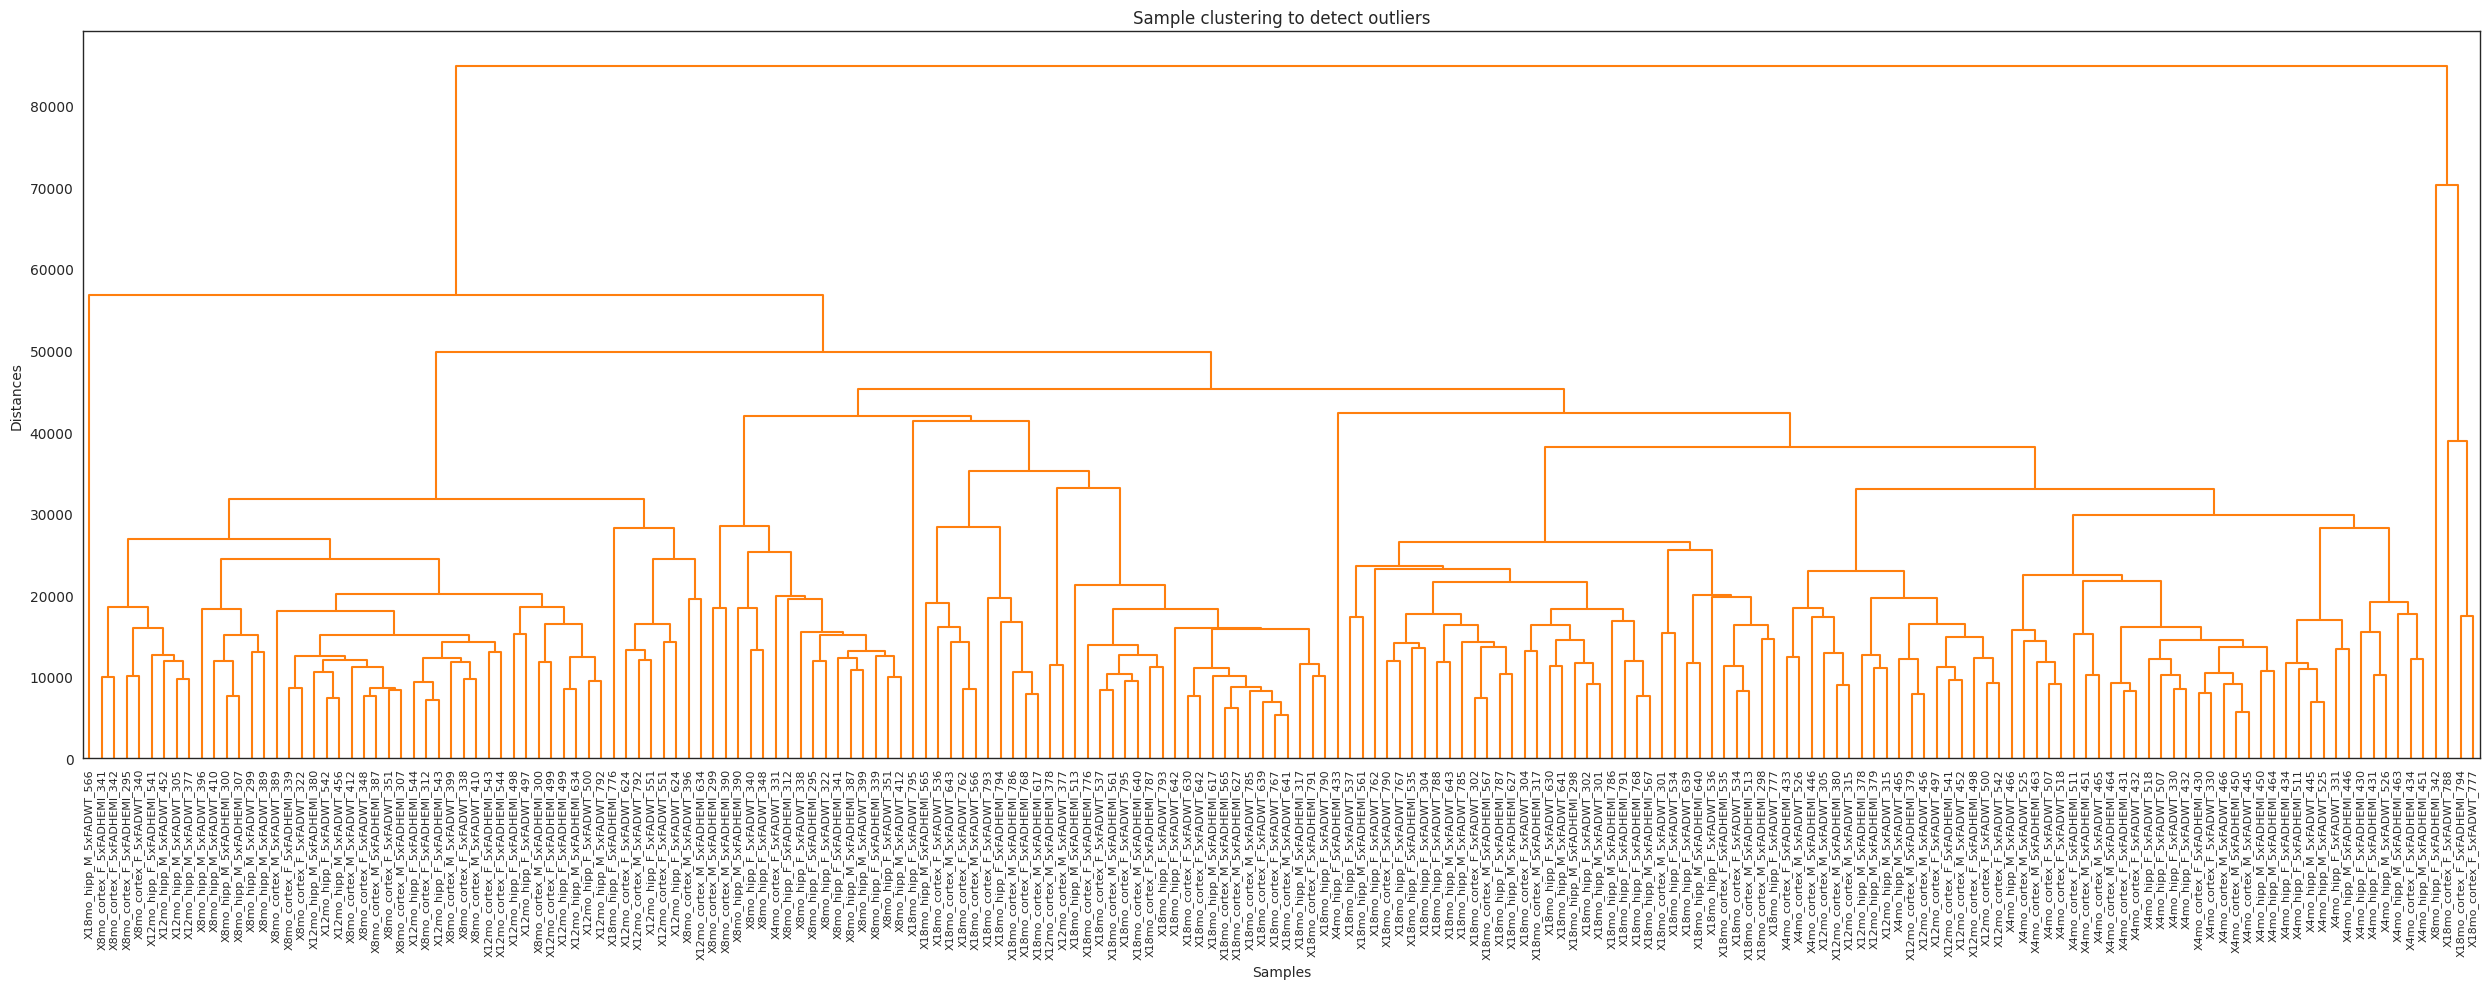

In [4]:
pyWGCNA_model.preprocess(show = True)

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876


    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.068792 -0.240657       0.280299  3652.578874  3800.852737   
1       2  0.568043 -0.915647        0.78568  1108.148182  1032.730792   
2       3  0.717702 -1.146349       0.938007   470.105021   367.188887   
3       4  0.793088 -1.323176       0.971082   240.275025   152.920968   
4       5  0.829789 -1.466143       0.977417   137.921458    69.632216   
5       6  0.862983 -1.567092       0.985283    85.696728     35.01005   
6       7   0.87901 -1.623685       0.988217    56.415672    18.594522   
7       8  0.893812 -1.655884       0.993785    38.821129     10.79537   
8       9  0.907304  -1.68106       0.996896    27.671719     6.852374   
9      10  0.910529 -1.707386         0.9978    20.302318     4.404117   
10     11  0.912421 -1.732006       0.997297    15.261356     2.900658   
11     13  0.915283 -1.758236       0.996929     9.155179     1.308141   
12     15  0.916354 -1.771983        0

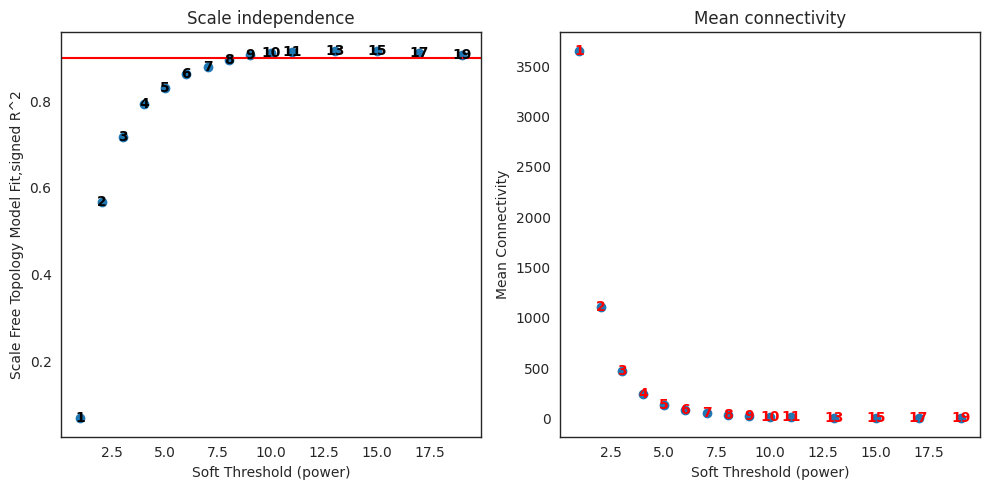

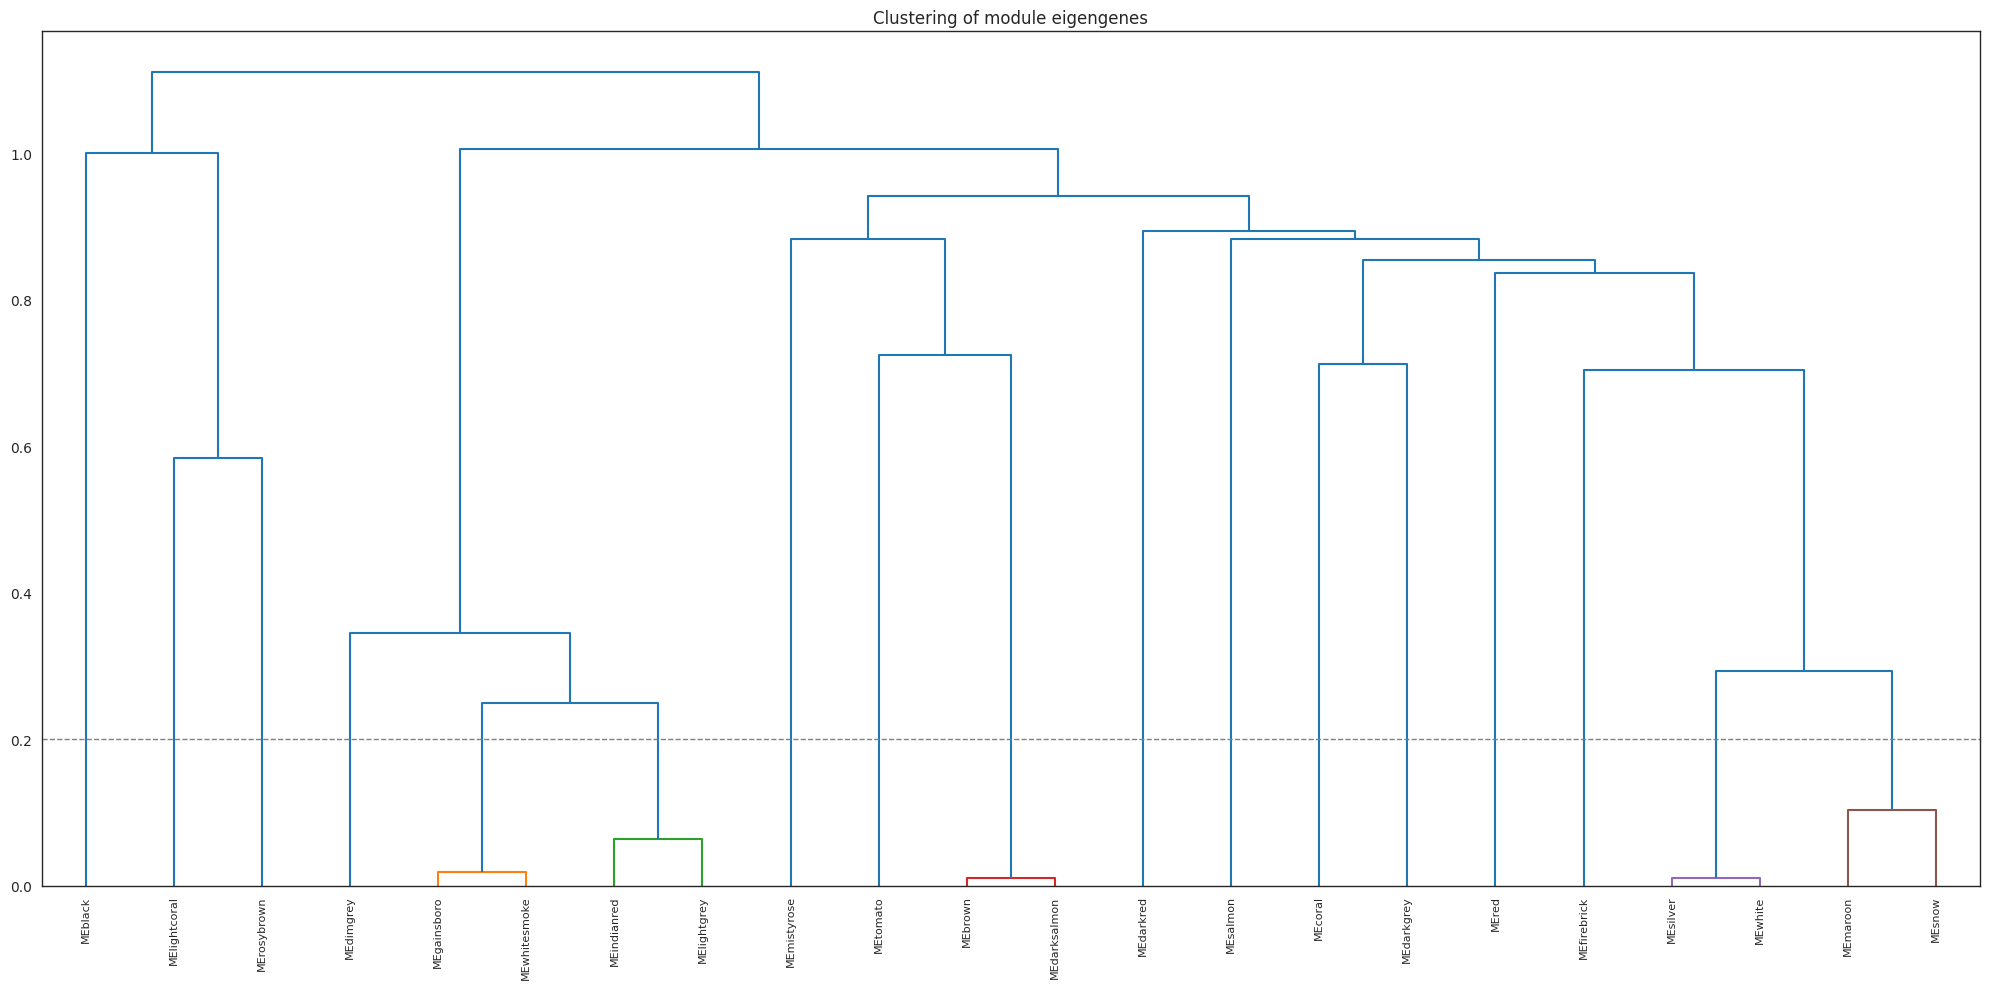

In [5]:
pyWGCNA_model.findModules()
# pyWGCNA_5xFAD.findModules(blockSize=1500, moreNetworkConcepts = True) # For some reason these don't work. Make the powerVector crash or block size goes into wrong functions

In [15]:
pyWGCNA_model.updateSampleInfo(path=sample_info_selection, sep=',')

# add color for metadata
pyWGCNA_model.setMetadataColor('Gender', {'Female': 'blue',
                                       'Male': 'pink'})
pyWGCNA_model.setMetadataColor('Primary Site Disease', {'Rectum': 'darkviolet',
                                                        'Colon': 'deeppink'})
pyWGCNA_model.setMetadataColor('Histology Subtype', {'Adenocarcinoma': 'thistle',
                                                    'Mucinous Adenocarcinoma': 'plum'})
pyWGCNA_model.setMetadataColor('Tumour Stage', {'Stage IV': 'red',
                                          'Stage III': 'orange',
                                          'Stage II': 'yellow',
                                          'Stage I': 'green'})

In [ ]:
# Automatic dataset builder from biomart.

geneList = PyWGCNA.getGeneList(dataset='homo_sapiens_ensembl',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'],
                               server_domain="http://ensembl.org/biomart")

'''
# We already have the file, so we just load it from the file
gene_list_path = working_dir + 'data/5xFAD_paper/geneList'
pyWGCNA_5xFAD.updateGeneInfo(path=gene_list_path, sep = ' ')

'''

Some visualizations

In [13]:
pyWGCNA_model.datExpr

pyWGCNA_model.datExpr.obs.head(5)

,Gender,Primary Site Disease,Histology Subtype,Tumour Stage
Sample_ID,,,,
CRC.SW.U0001.T,Female,Rectum,Adenocarcinoma,Stage II
CRC.SW.U0002.T,Female,Colon,Adenocarcinoma,Stage III
CRC.SW.U0004.T,Female,Colon,Adenocarcinoma,Stage II
CRC.SW.U0005.T,Female,Colon,Adenocarcinoma,Stage III
CRC.SW.U0006.T,Male,Colon,Adenocarcinoma,Stage III


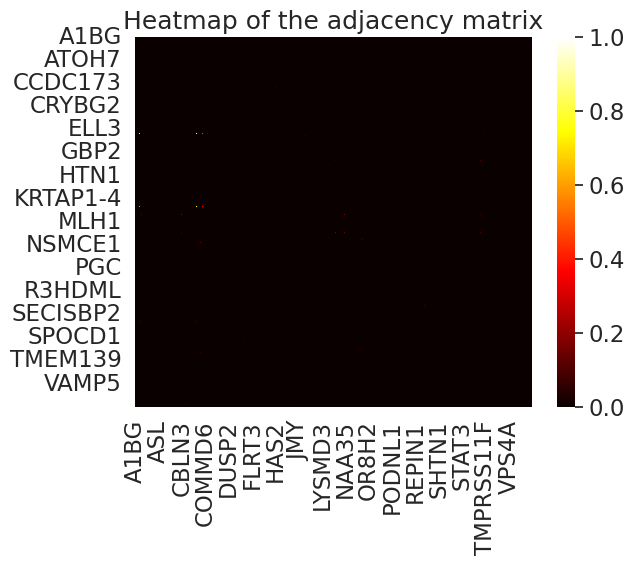

In [20]:
# Plotting the adjacency matrix as heatmap
plt.figure()
sns.heatmap(pyWGCNA_model.adjacency, cmap='hot')
plt.title("Heatmap of the adjacency matrix")
plt.savefig(working_dir + 'results/WGCNA_figures/' + "Heatmap of the adjacency matrix", dpi=1000)
plt.show()


Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...


ValueError: Image size of 118300x2000 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7f10b8cca700> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 118300x2000 pixels is too large. It must be less than 2^16 in each direction.

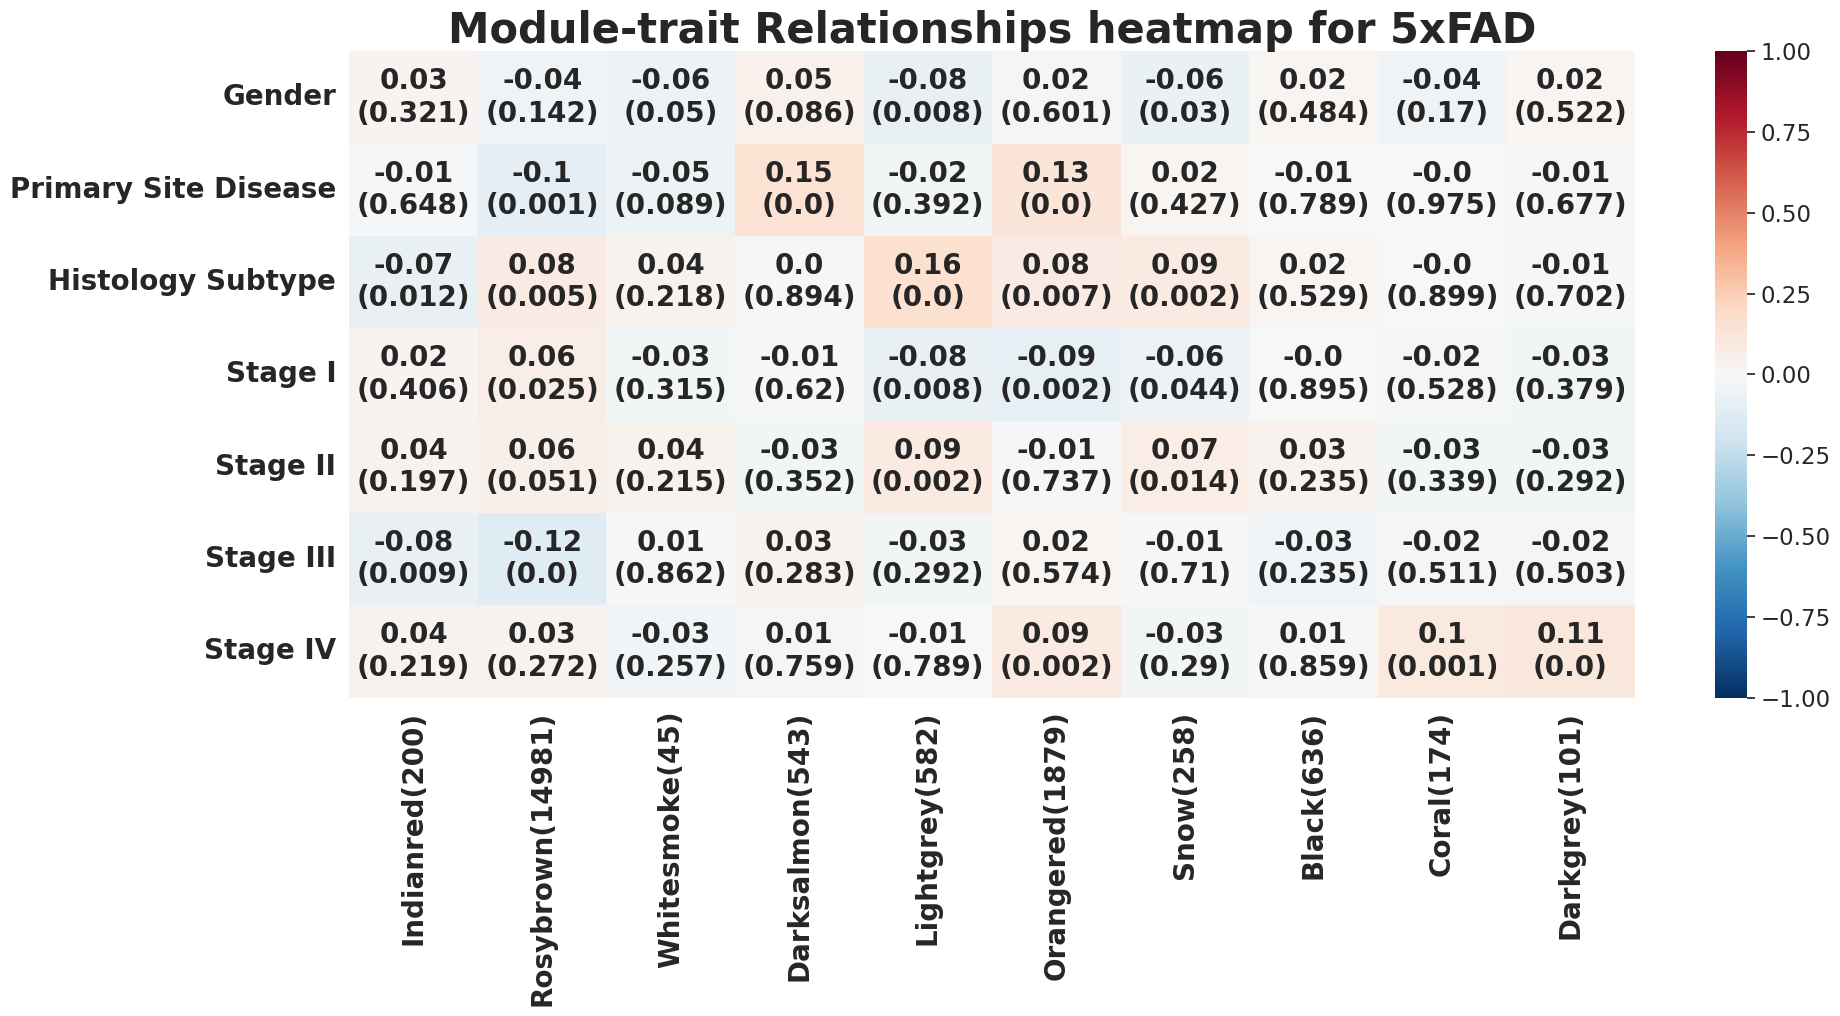

ValueError: Image size of 118300x2000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 118300x2000 with 8 Axes>

In [16]:
pyWGCNA_model.analyseWGCNA()

In [19]:
pyWGCNA_model.top_n_hub_genes(moduleName="Indianred", n=50)


Module name does not exist in 
